# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"q={city}&units=metric&APPID={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longquan
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | al jawf
Processing Record 10 of Set 1 | tazovsky
Processing Record 11 of Set 1 | rosarito
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | woodland park
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | mitsamiouli
Processing Record 18 of Set 1 | happy valley-goose bay
Processing Record 19 of Set 1 | waingapu
Processing Record 20 of Set 1 | lihue
Processing Record 21 of Set 1 | coquimbo
Processing Reco

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longquan,24.6719,102.1613,25.86,77,100,0.62,CN,1691302092
1,saint-philippe,-21.3585,55.7679,22.77,77,75,7.25,RE,1691302093
2,margaret river,-33.9500,115.0667,15.23,62,74,2.19,AU,1691302093
3,bethel,41.3712,-73.4140,21.17,82,0,1.54,US,1691301978
4,waitangi,-43.9535,-176.5597,8.23,61,85,8.67,NZ,1691302094


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longquan,24.6719,102.1613,25.86,77,100,0.62,CN,1691302092
1,saint-philippe,-21.3585,55.7679,22.77,77,75,7.25,RE,1691302093
2,margaret river,-33.9500,115.0667,15.23,62,74,2.19,AU,1691302093
3,bethel,41.3712,-73.4140,21.17,82,0,1.54,US,1691301978
4,waitangi,-43.9535,-176.5597,8.23,61,85,8.67,NZ,1691302094


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

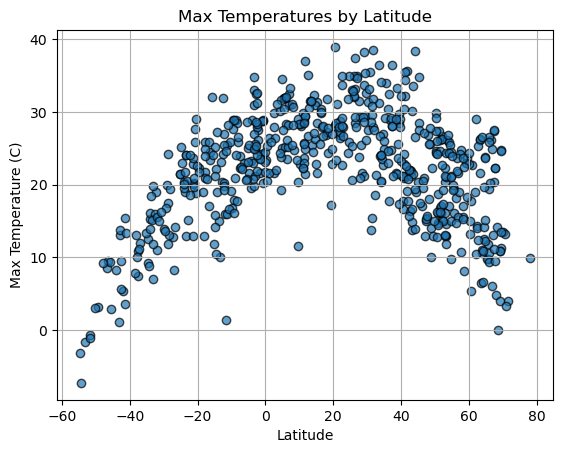

In [11]:
# Build scatter plot for latitude vs. temperature
latitudes = city_data_df["Lat"]
temperatures = city_data_df["Max Temp"]
plt.scatter(latitudes, temperatures, edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.title("Max Temperatures by Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

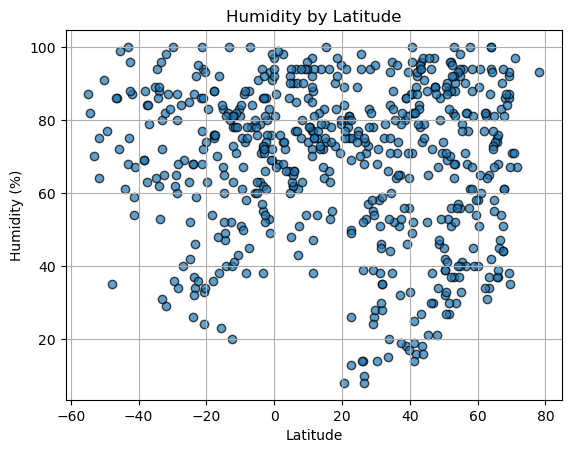

In [12]:
# Build the scatter plots for latitude vs. humidity
latitudes = city_data_df["Lat"]
humidities = city_data_df["Humidity"]
plt.scatter(latitudes, humidities, edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.title("Humidity by Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

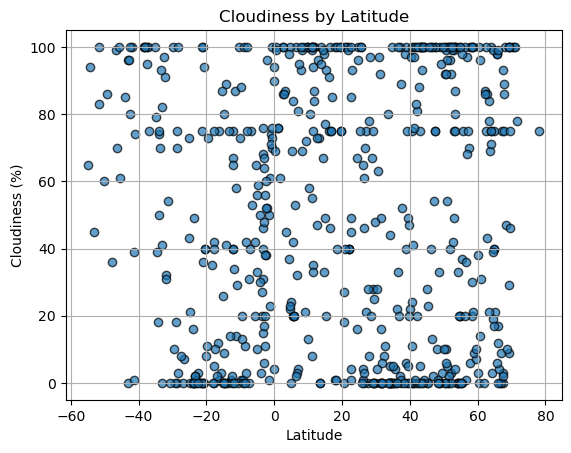

In [13]:
# Build the scatter plots for latitude vs. cloudiness
latitudes = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.scatter(latitudes, cloudiness, edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.title("Cloudiness by Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

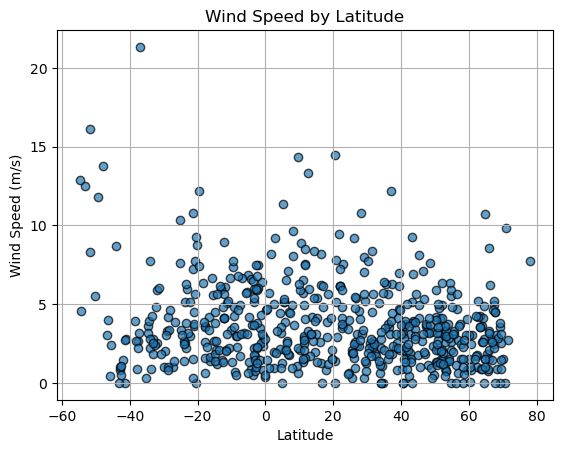

In [14]:
# Build the scatter plots for latitude vs. wind speed
latitudes = city_data_df["Lat"]
wind_speeds = city_data_df["Wind Speed"]
plt.scatter(latitudes, wind_speeds, edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.title("Wind Speed by Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [80]:
# Define a function to create Linear Regression plots
def plot_linreg(x_col, y_col, coord):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_col, y_col)
    correlation = st.pearsonr(x_col, y_col)
    regress_values = x_col * slope + intercept
    line_eq = f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}"
    plt.scatter(x_col, y_col)
    plt.xlabel(x_col.name)
    plt.ylabel(y_col.name)
    plt.title(f"{y_col.name} v. {x_col.name}")
    plt.plot(x_col, regress_values, color="red")
    plt.annotate(line_eq, coord, fontsize=15, color="red")
    print(f"The correlation between {x_col.name} and {y_col.name} is {round(correlation[0], 2)}.")
    print(f"The r value is {correlation[1]}.")
    plt.show()

In [77]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

'City'

In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saint-philippe,-21.3585,55.7679,22.77,77,75,7.25,RE,1691302093
2,margaret river,-33.9500,115.0667,15.23,62,74,2.19,AU,1691302093
4,waitangi,-43.9535,-176.5597,8.23,61,85,8.67,NZ,1691302094
6,port-aux-francais,-49.3500,70.2167,3.21,77,86,11.79,TF,1691302095
7,touros,-5.1989,-35.4608,25.08,76,10,6.83,BR,1691302078


###  Temperature vs. Latitude Linear Regression Plot

The correlation between Lat and Max Temp is -0.58.
The r value is 5.1330444678368e-37.


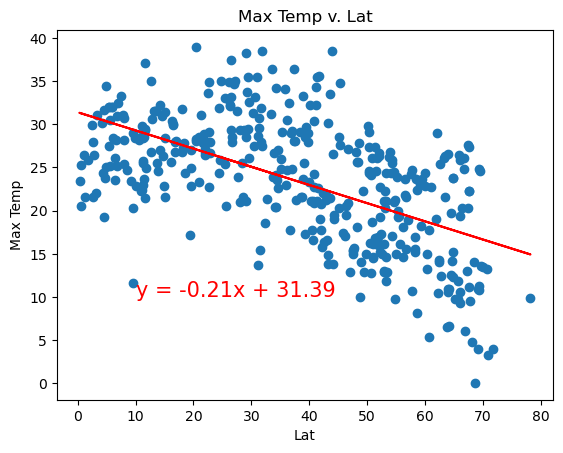

In [81]:
# Linear regression on Northern Hemisphere
plot_linreg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (10,10))

The correlation between Lat and Max Temp is 0.79.
The r value is 6.431155453276713e-43.


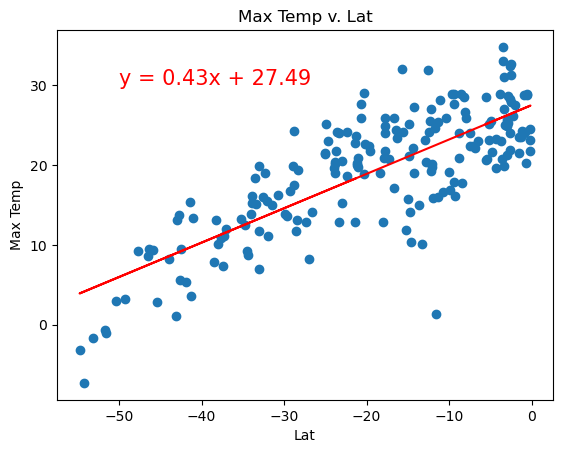

In [82]:
# Linear regression on Southern Hemisphere
plot_linreg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (-50,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The correlation between Lat and Humidity is -0.1.
The r value is 0.05104090610323894.


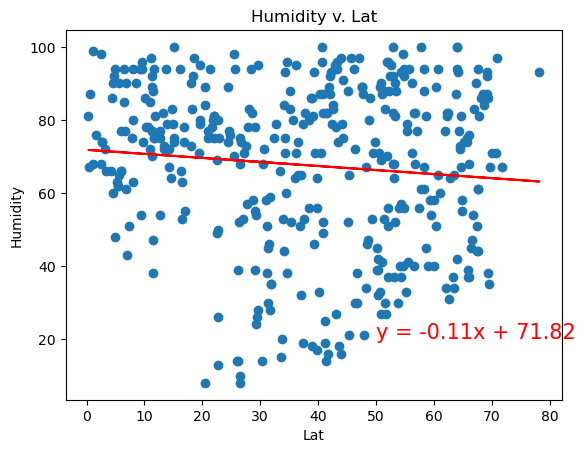

In [83]:
# Northern Hemisphere
plot_linreg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (50,20))

The correlation between Lat and Humidity is -0.04.
The r value is 0.605807251249261.


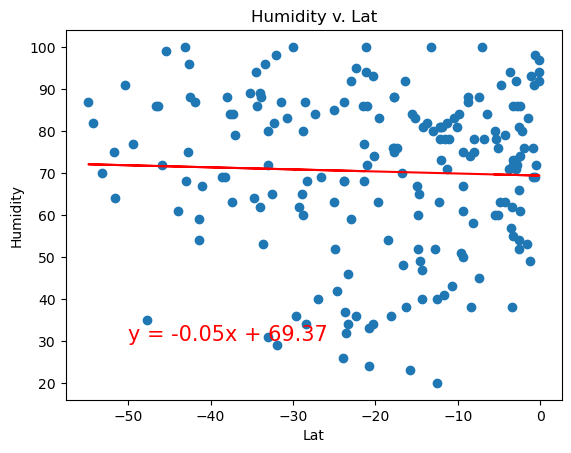

In [84]:
# Southern Hemisphere
plot_linreg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-50,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between Lat and Cloudiness is -0.08.
The r value is 0.1207009446367074.


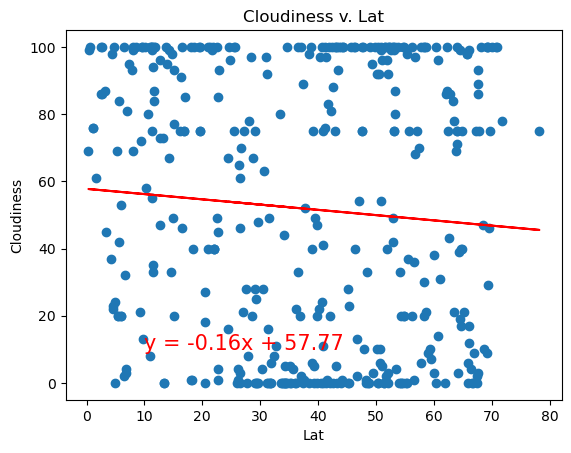

In [85]:
# Northern Hemisphere
plot_linreg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (10,10))

The correlation between Lat and Cloudiness is -0.24.
The r value is 0.0006600718179213473.


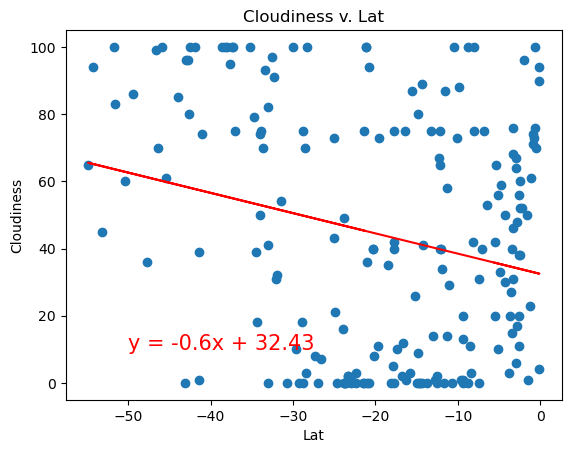

In [86]:
# Southern Hemisphere
plot_linreg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-50,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between Lat and Wind Speed is -0.22.
The r value is 1.201333142469629e-05.


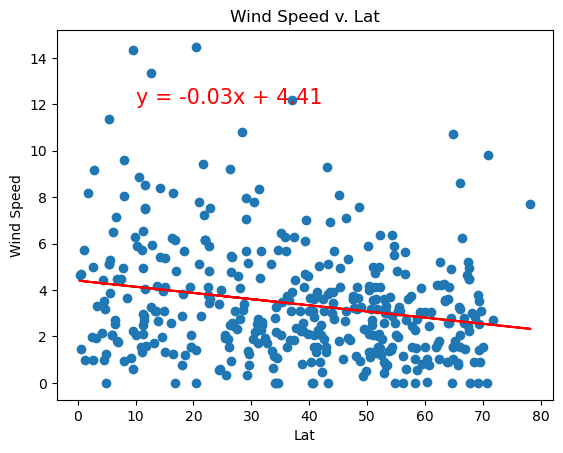

In [87]:
# Northern Hemisphere
plot_linreg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (10,12))

The correlation between Lat and Wind Speed is -0.16.
The r value is 0.023019535274755826.


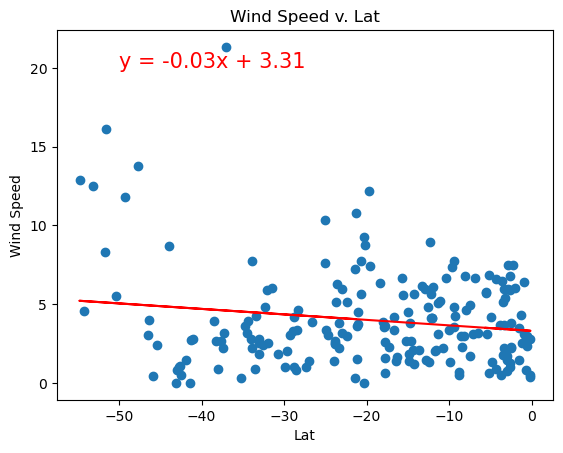

In [88]:
# Southern Hemisphere
plot_linreg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE